Duplicated rows in the shopping dataset: 0
Number of outliers: 0
Mean Absolute Error (MAE): 9.519450754734675e-15
Mean Squared Error (MSE): 1.9392223770602268e-28
Root Mean Squared Error (RMSE): 1.3925596493724163e-14
R^2 Score: 1.0
Cross-Validation R² Scores: [1. 1. 1. 1. 1.]
Mean CV R² Score: 1.0


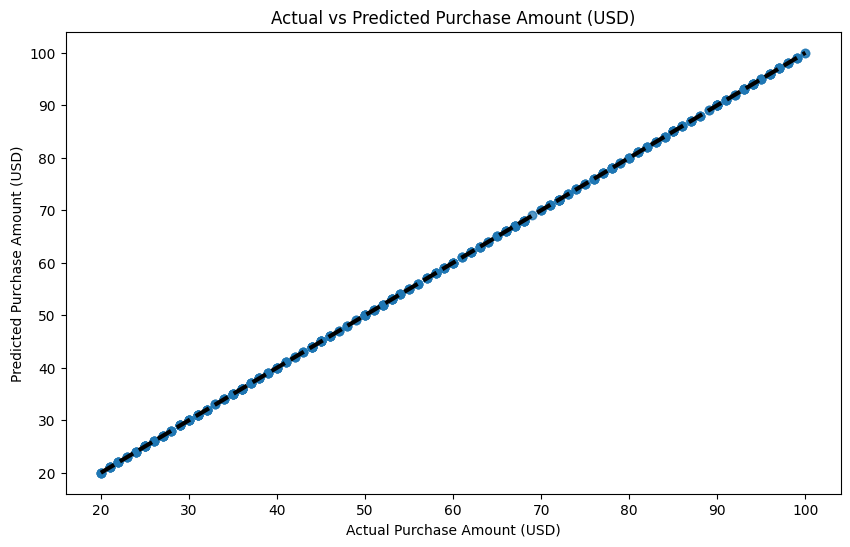

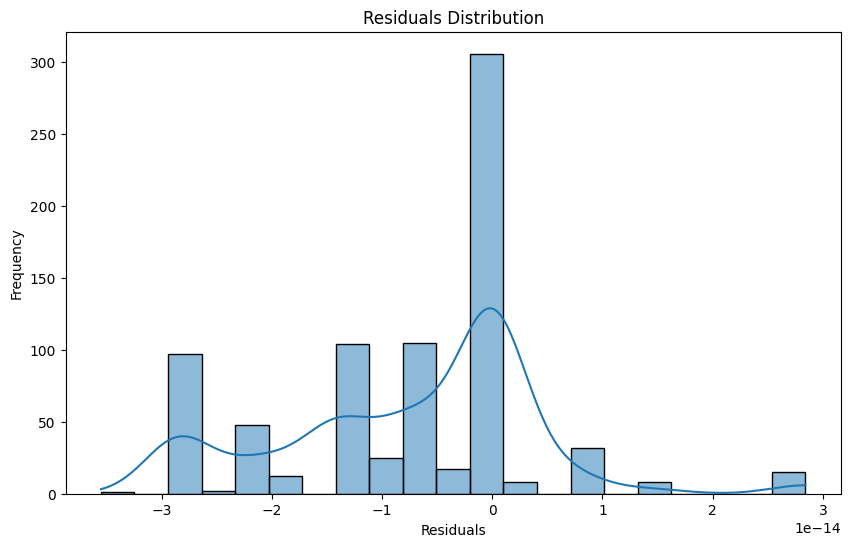

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with your actual dataset file)
shopping_dataset = pd.read_csv('shopping_trends_updated.csv')

# check for null values
shopping_dataset.isnull()

# check for duplicates
duplicate_set = shopping_dataset.duplicated().sum()
print(f'Duplicated rows in the shopping dataset: {duplicate_set}')

# check for outliers
z_scores = np.abs(stats.zscore(shopping_dataset.select_dtypes(include=np.number)))
outliers = (z_scores > 3).any(axis=1)
print(f'Number of outliers: {outliers.sum()}')

# 'Purchase Amount (USD)' as the target variable
target_variable = 'Purchase Amount (USD)'

# define features (exclude target variable and any non-predictive columns)
features = shopping_dataset.drop(columns=['Customer ID', 'Item Purchased', 'Category', 'Location', 'Payment Method', 'Frequency of Purchases', 'Subscription Status'])

# encode categorical variables using one-hot encoding
features_encoded = pd.get_dummies(features)

# define X (features) and y (target)
X = features_encoded
y = shopping_dataset[target_variable]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model initialization and training
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# predictions
y_pred = linear_reg_model.predict(X_test)

# evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# cross-validation
cv_scores = cross_val_score(linear_reg_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean()}")

# visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Purchase Amount (USD)')
plt.ylabel('Predicted Purchase Amount (USD)')
plt.title('Actual vs Predicted Purchase Amount (USD)')
plt.show()

# visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

